# Unemployment rate with level of education
by Jan Theil (6099756), 25.11.2021

---

## Summary
The correlation between education and unemplyments rates in Germany and the USA is evaluated in this project.

## Tasks
The project follows the following steps:
<ol start="0">
  <li>Collect and download needed data.</li>
  <li> Explore the data about education and employment rates collected from multiple websites.</li>
  <li>Linear regression.</li>
  <li>RSS vs. polyfit.</li>
  <li>Pairs bootstrap between education and unemployment rates + condifence intervals.</li>
  <li>Plot bootstrap regressions.</li>
  <li>Hypothesis test on Pearson correlation.</li>
  <li>Conclusions.</li>
</ol>

In [1]:
# Imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import numpy as np

from data import read_raw_data, merge_and_clean_data, plot_data, pearson_r, plot_linear_regression, linear_regression_vs_rss
from data import pairs_bootstrap, plot_single_data, pearson_coefficient_hypothesis_test, slope_vs_rss

# Task 1

---------------------------------------------

## Explore data

In order to extract the needed data, the raw data firstly has to be inspected.

## Findings
- The data column names and datatypes are different.
- Eurostat data contains more countries than OECD data.
- Eurostat data slightly differs from OECD data (for Germany).

## Next Step:
- Normalize column names.
- Extract Germany from eurostrat data set.
- Merge all 3 data sets into one.
- Get the mean between OECD and eurostat data for Germany because they differ slightly but mostly fit.
- Save merged and cleaned data set in `unemployment_edu.csv`.

EUROSTAT


,TIME,GEO,SEX,AGE,ISCED11,UNIT,Value,Flag and Footnotes
0,2002,European Union - 28 countries (2013-2020),Total,From 25 to 64 years,"Less than primary, primary and lower secondary...",Percentage,10.1,NaN
1,2002,European Union - 15 countries (1995-2004),Total,From 25 to 64 years,"Less than primary, primary and lower secondary...",Percentage,9.1,NaN
2,2002,Euro area - 19 countries (from 2015),Total,From 25 to 64 years,"Less than primary, primary and lower secondary...",Percentage,9.9,NaN
3,2002,Belgium,Total,From 25 to 64 years,"Less than primary, primary and lower secondary...",Percentage,9.8,NaN
4,2002,Bulgaria,Total,From 25 to 64 years,"Less than primary, primary and lower secondary...",Percentage,27.6,NaN
...,...,...,...,...,...,...,...,...
641,2018,United Kingdom,Total,From 25 to 64 years,"Less than primary, primary and lower secondary...",Percentage,5.0,NaN
642,2018,Montenegro,Total,From 25 to 64 years,"Less than primary, primary and lower secondary...",Percentage,21.0,NaN
643,2018,North Macedonia,Total,From 25 to 64 years,"Less than primary, primary and lower secondary...",Percentage,23.1,NaN
644,2018,Serbia,Total,From 25 to 64 years,"Less than primary, primary and lower secondary...",Percentage,13.4,NaN


['European Union - 28 countries (2013-2020)'
 'European Union - 15 countries (1995-2004)'
 'Euro area - 19 countries  (from 2015)' 'Belgium' 'Bulgaria' 'Czechia'
 'Denmark' 'Germany (until 1990 former territory of the FRG)' 'Estonia'
 'Ireland' 'Greece' 'Spain' 'France' 'Croatia' 'Italy' 'Cyprus' 'Latvia'
 'Lithuania' 'Luxembourg' 'Hungary' 'Malta' 'Netherlands' 'Austria'
 'Poland' 'Portugal' 'Romania' 'Slovenia' 'Slovakia' 'Finland' 'Sweden'
 'Iceland' 'Norway' 'Switzerland' 'United Kingdom' 'Montenegro'
 'North Macedonia' 'Serbia' 'Turkey']

OECD


C:\Users\janth\AppData\Local\Temp/ipykernel_16740/293313508.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eurostat_germany_low["TIME"] = eurostat_germany_low["TIME"].astype(int)
C:\Users\janth\AppData\Local\Temp/ipykernel_16740/293313508.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eurostat_germany_low["Value"] = eurostat_germany_low["Value"].astype(float)


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,DEU,UNEMPEDU,BUPPSRY,PC_25_64,A,2002,15.316512,NaN
1,DEU,UNEMPEDU,BUPPSRY,PC_25_64,A,2003,18.005415,NaN
2,DEU,UNEMPEDU,BUPPSRY,PC_25_64,A,2004,20.498941,NaN
3,DEU,UNEMPEDU,BUPPSRY,PC_25_64,A,2005,20.146818,NaN
4,DEU,UNEMPEDU,BUPPSRY,PC_25_64,A,2006,19.845667,NaN
5,DEU,UNEMPEDU,BUPPSRY,PC_25_64,A,2007,17.995710,NaN
6,DEU,UNEMPEDU,BUPPSRY,PC_25_64,A,2008,16.505592,NaN
7,DEU,UNEMPEDU,BUPPSRY,PC_25_64,A,2009,16.732357,NaN
8,DEU,UNEMPEDU,BUPPSRY,PC_25_64,A,2010,15.897300,NaN
9,DEU,UNEMPEDU,BUPPSRY,PC_25_64,A,2011,13.904875,NaN


['DEU' 'USA' 'OAVG']


C:\Users\janth\AppData\Local\Temp/ipykernel_16740/293313508.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oecd_data_low["TIME"] = oecd_data_low["TIME"].astype(int)
C:\Users\janth\AppData\Local\Temp/ipykernel_16740/293313508.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oecd_data_low["Value"] = oecd_data_low["Value"].astype(float)


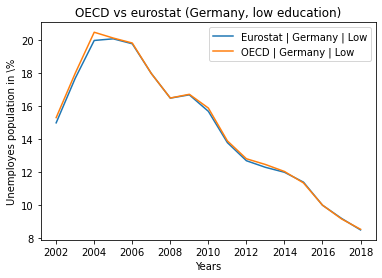

In [2]:
# Inspect raw data of euro stat
eurostat = Path("rawdata", "eurostat")
eurostat_data = read_raw_data(low_file=eurostat.joinpath("EuroStat_Low_Germany.csv"),
                              middle_file=eurostat.joinpath("EuroStat_Middle_Germany.csv"),
                              high_file=eurostat.joinpath("EuroStat_High_Germany.csv"))

print("EUROSTAT\n=============")
display(eurostat_data["Low"])
print(eurostat_data["Low"]["GEO"].unique())

# Get data from Germany and plot it
df = eurostat_data["Low"]
eurostat_germany_low = df.loc[df["GEO"] == "Germany (until 1990 former territory of the FRG)"]
eurostat_germany_low["TIME"] = eurostat_germany_low["TIME"].astype(int)
eurostat_germany_low["Value"] = eurostat_germany_low["Value"].astype(float)
plt.xlabel("Years")
plt.ylabel("Unemployes population in \%")
plt.plot("TIME", "Value", data=eurostat_germany_low, label="Eurostat | Germany | Low")

# Inspect raw data of OECD
oecd = Path("rawdata", "oecd")
oecd_data = read_raw_data(low_file=oecd.joinpath("OECD_Low_Germany_USA.csv"),
                          middle_file=oecd.joinpath("OECD_Middle_Germany_USA.csv"),
                          high_file=oecd.joinpath("OECD_High_Germany_USA.csv"))
print("\nOECD\n=============")
display(oecd_data["Low"])
print(oecd_data["Low"]["LOCATION"].unique())

# Get data from Germany and plot it
df = oecd_data["Low"]
oecd_data_low = df.loc[df["LOCATION"] == "DEU"]
oecd_data_low["TIME"] = oecd_data_low["TIME"].astype(int)
oecd_data_low["Value"] = oecd_data_low["Value"].astype(float)
plt.plot("TIME", "Value", data=oecd_data_low, label="OECD | Germany | Low")
plt.title("OECD vs eurostat (Germany, low education)")
plt.legend()
plt.show()


## Merge and clean data

Merge the data sets provided by eurostrat and OECD and save the normalized data set into `unemployment_edu.csv`.

,Year,USA - Low,USA - Middle,USA - High,Germany - Low,Germany - Middle,Germany - High
0,2002,10.184658,5.686646,3.019947,15.158256,8.853197,4.398122
1,2003,9.891610,6.061996,3.369871,17.852708,10.118326,5.095912
2,2004,10.472992,5.637989,3.259702,20.249471,11.106022,5.474830
3,2005,9.008231,5.116411,2.634438,20.123409,11.007926,5.532941
4,2006,8.254849,4.564320,2.543415,19.822834,9.904787,4.806669
5,2007,8.470968,4.515807,2.114559,17.997855,8.290853,3.817827
6,2008,10.056567,5.295119,2.419764,16.502796,7.199160,3.305334
7,2009,15.778392,9.786595,4.884539,16.716178,7.507387,3.402633
8,2010,16.820261,11.228783,5.334135,15.798650,6.907699,3.044276
9,2011,16.170530,10.190528,4.904751,13.852438,5.754725,2.422070


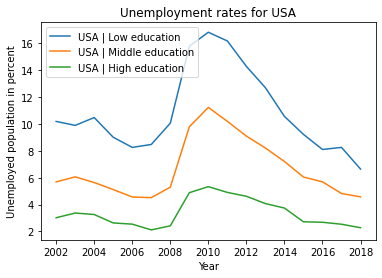

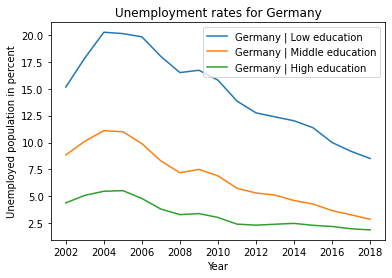

In [3]:
# Extracting, cleaning and merging data is done by the following helper function:
clean_data = merge_and_clean_data(eurostat_data, oecd_data)
display(clean_data)

# Save data to CSV file
clean_data.to_csv("unemployment_edu.csv")

# Plot data
plot_data(clean_data, "USA")
plot_data(clean_data, "Germany")

## Pearson coefficient

Check if there is a correlation between the unemployment rates of people with low, high and middle education in one country.

## Findings
- All employment rates correlate with each other (pearson > 0)
  - The curves fit with each other on a certain level, so employment rates are (besides the educational level) also highly time dependent.

In [4]:
# Pearson for USA
usa1 = pearson_r(clean_data["USA - Low"], clean_data["USA - Middle"])
usa2 = pearson_r(clean_data["USA - Low"], clean_data["USA - High"])
print("USA", usa1, usa2)  # Both > 0: correlate

# Preason for Germany
germ1 = pearson_r(clean_data["Germany - Low"], clean_data["Germany - Middle"])
germ2 = pearson_r(clean_data["Germany - Low"], clean_data["Germany - High"])
print("Germany", germ1, germ2)  # Both > 0: correlate


USA 0.9691689314586223 0.9628178522127707
Germany 0.9666440312284225 0.911975489026696


# Task 2 & 3

-------------------------------

## Linear regression

Perform linear regression on data sets with `np.polyfit`.

## Findings
- Linear regression (1D) does not fit USA data: Is not linear if you look at it. 
  - 3D fits better this data set.
- Linear regression fits data from Germany pretty good.
- Units
  - Slope: Unemployment delta in % for 1 Year.
  - Intercept: Accumulated unemployed percentage at year 0.
- If slope is positive: Unemployment rate rises over time (=> Bad).
- If slope is negative: Unemployment rate falls over time (=> Good).

USA | Low education 
Slope:  -0.05455889460784903  Intercept:  120.53740656177654


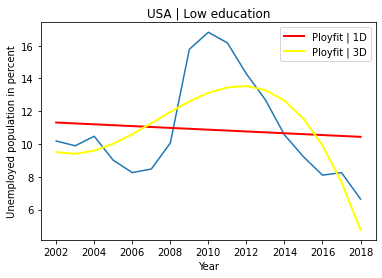

USA | Middle education 
Slope:  0.041755677450979405  Intercept:  -77.23922154705683


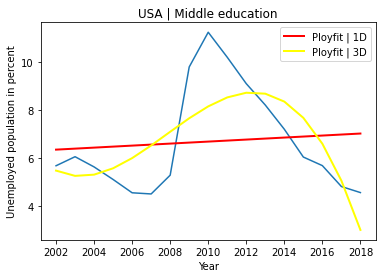

USA | High education 
Slope:  0.0007032049019595188  Intercept:  1.9474484647084258


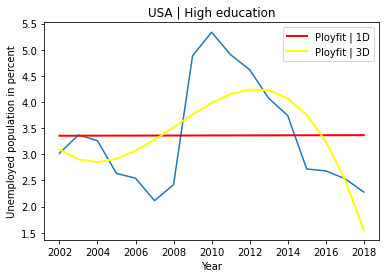

Germany | Low education 
Slope:  -0.6798887637255278  Intercept:  1381.3014431324284


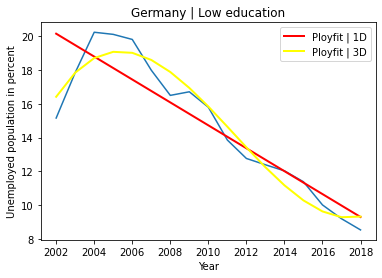

Germany | Middle education 
Slope:  -0.5146932547794356  Intercept:  1041.3471310272537


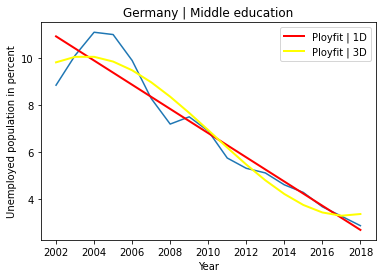

Germany | High education 
Slope:  -0.23034781875001029  Intercept:  466.34757713163816


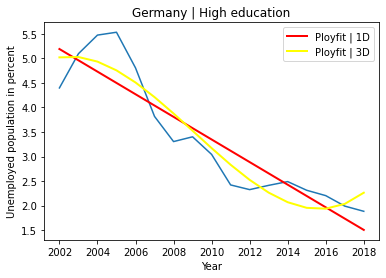

In [5]:
# USA
plot_linear_regression(clean_data["Year"].dt.year, clean_data["USA - Low"], "USA | Low education")
plot_linear_regression(clean_data["Year"].dt.year, clean_data["USA - Middle"], "USA | Middle education")
plot_linear_regression(clean_data["Year"].dt.year, clean_data["USA - High"], "USA | High education")

# Germany
plot_linear_regression(clean_data["Year"].dt.year, clean_data["Germany - Low"], "Germany | Low education")
plot_linear_regression(clean_data["Year"].dt.year, clean_data["Germany - Middle"], "Germany | Middle education")
plot_linear_regression(clean_data["Year"].dt.year, clean_data["Germany - High"], "Germany | High education")

## Compare RSS with np.polyfit (1D)

In order to calculate the RSS:
1. Specify empty array between min and max value of x-axis.
2. Calculate RSS within empty array with `np.sum((y - a * x - b) ** 2)`.
3. Plot results.

Extra:
- Plot residuals of linear regression with data set.

## Findings
- RSS for USA data is pretty high and RSS  for Germany is low.
  - USA data does not fit linear regression model as good as data from Germany.
    - This fits the observation from above.

USA | Low education 
RSS:  154.85394771448625


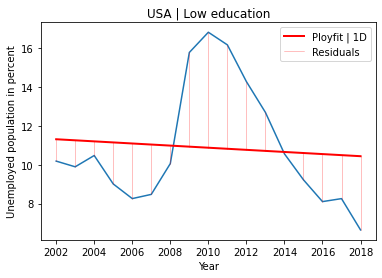

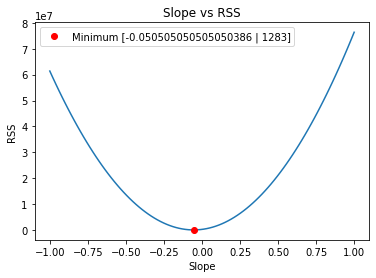

USA | Middle education 
RSS:  75.61970226267367


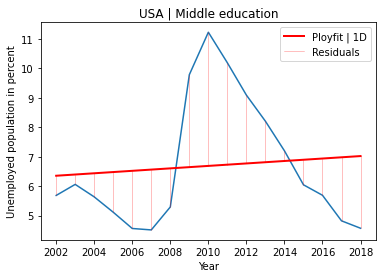

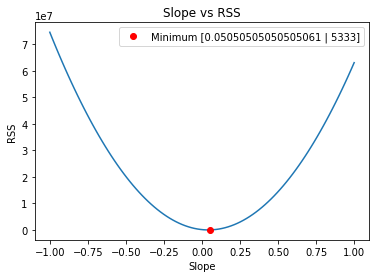

USA | High education 
RSS:  17.311969478887878


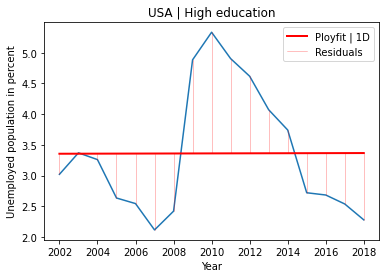

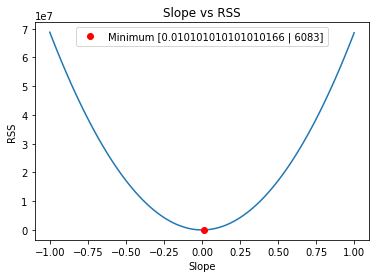

Germany | Low education 
RSS:  46.13814787698912


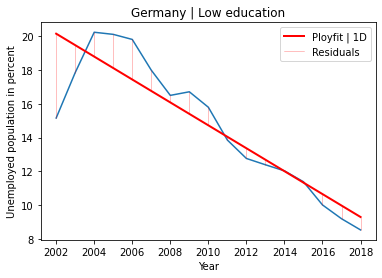

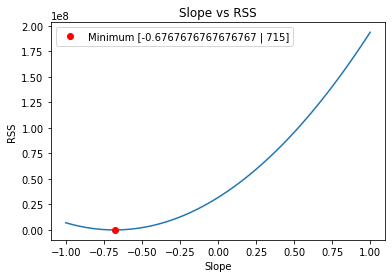

Germany | Middle education 
RSS:  10.607739999816157


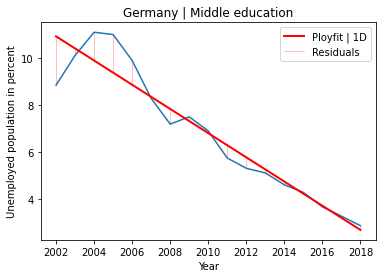

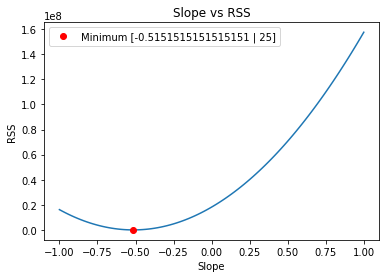

Germany | High education 
RSS:  4.124125287079211


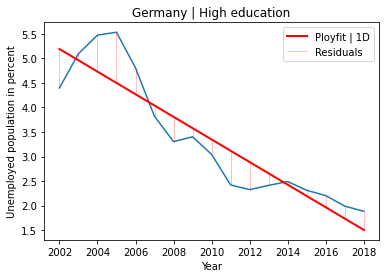

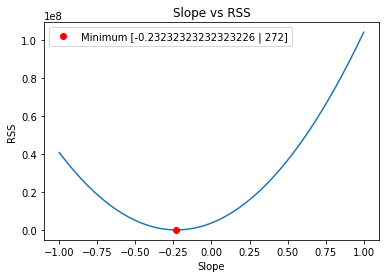

In [6]:

# Plot RSS and residuals
for country in ["USA", "Germany"]:
    for education in ["Low", "Middle", "High"]:
        linear_regression_vs_rss(clean_data["Year"].dt.year, clean_data[F"{country} - {education}"], F"{country} | {education} education")
        slope_vs_rss(clean_data["Year"].dt.year, clean_data[F"{country} - {education}"])

# Task 4

----------------

## Pairs bootstrap & confidence interval

Perform pairs bootstrap to plot a histogram describing the estimate of the slope from the education and unemployment rates data. Also report the 95% confidence interval of the slope.

## Method
- Calculate slopes with `pairs_bootstrap` and plot them with `plt.hist`.
- Caclulate confidence intervals with `np.percentile`.

## Notice
Only low education data from Germany will be analyzed. Method for other dataset is the same.

Confidence interval:  [-0.9060442  -0.46776566]


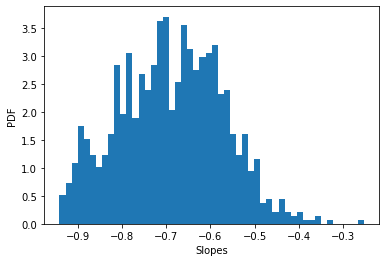

In [7]:
# Calculate bootrstrap pairs
slopes, intercepts = pairs_bootstrap(clean_data["Year"].dt.year, clean_data["Germany - Low"], 1000)

# Plot slopes
plt.xlabel("Slopes")
plt.ylabel("PDF")
_ = plt.hist(slopes, bins=50, density=True)

# Calculate 95% confidence interval
print("Confidence interval: ", np.percentile(slopes, [2.5, 97.5]))

# Task 5

-------------------

## Plotting bootstrap regressions

Plot 100 lines from bootstrap values calculated in Task 4.

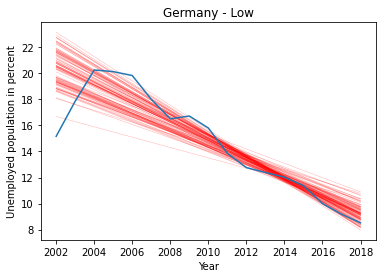

In [10]:
# Min and max value of plot.
x = np.array([clean_data["Year"].dt.year.min(), clean_data["Year"].dt.year.max()])

# Plot line between min and max using values from task 4.
for i in range(100):
    _ = plt.plot(x, slopes[i] * x + intercepts[i], linewidth=0.5, alpha=0.3, color="red")

# Plot data set.
plot_single_data(clean_data, "Germany - Low")

# Task 6

-------------

## Hypothesis test on Pearson correlation

Test with pearson correlation the following null-hypothesis:<br>
<b>The unemployment rate of a given country is totally independent of its education rate.</b>

## Method
- Calculate the pearson value of unemployment and education rate.
- Permutate some values but leave education values fixed.
- For each permutation, compute the pearson correlation coefficient and assess how many of your permutation replicates have a pearson correlation coefficient greater than the observed one.
- If the p value is low, the alternative hypothesis (<b>The unemployment rate of a given country depends on its education rate</b>) will be accepted.
- If p value is high, null-hypothesis will be accepted.

## Findings
- p-values with data of the same country are extremely low (=0).
  - Alternative hypothesis is accepted.
    - Unemployment rates depend on the education level.
- Even though the unemployment rates correlate with each other (see Task 1), the mean of the unemployment rates differ. In every country, the employment rates for higher educated people is higher than for people with low education.

## Extra test
Check if unemployment rates in Germany and USA correlate with each other.
- Null-hypothesis: <b>Unemployment rates in Germany and USA do not correlate with each other.</b>
- p value is high
  - Null-hypothesis accepted: <b>Employment rates do not correlate.</b>

In [9]:
# USA
print("USA\n===================")
print("Low vs Middle")
pearson_coefficient_hypothesis_test(clean_data["USA - Low"], clean_data["USA - Middle"])

print("\nMiddle vs High")
pearson_coefficient_hypothesis_test(clean_data["USA - Middle"], clean_data["USA - High"])

print("\nMean comparison:")
print("Low: ", np.mean(clean_data["USA - Low"]), "\nMiddle: ", np.mean(clean_data["USA - Middle"]), "\nHigh: ", np.mean(clean_data["USA - High"]))

# Germany
print("\n\nGermany\n===================")
print("Low vs Middle")
pearson_coefficient_hypothesis_test(clean_data["Germany - Low"], clean_data["Germany - Middle"])

print("\nMiddle vs High")
pearson_coefficient_hypothesis_test(clean_data["Germany - Middle"], clean_data["Germany - High"])

print("\nMean comparison:")
print("Low: ", np.mean(clean_data["Germany - Low"]), "\nMiddle: ", np.mean(clean_data["Germany - Middle"]), "\nHigh: ", np.mean(clean_data["Germany - High"]))

# USA vs Germany
usa = (clean_data["USA - Low"] + clean_data["USA - Middle"] + clean_data["USA - High"]) / 3
germany = (clean_data["Germany - Low"] + clean_data["Germany - Middle"] + clean_data["Germany - High"]) / 3
print("\n\nUSA vs Germany\n===================")
pearson_coefficient_hypothesis_test(usa, germany)

USA
Low vs Middle
Observed pearson:  0.9691689314586223
P-Value:  0.0

Middle vs High
Observed pearson:  0.9803399029630919
P-Value:  0.0

Mean comparison:
Low:  10.8740284 
Middle:  6.6896901294117646 
High:  3.3608903176470584


Germany
Low vs Middle
Observed pearson:  0.9666440312284225
P-Value:  0.0

Middle vs High
Observed pearson:  0.9787541342103474
P-Value:  0.0

Mean comparison:
Low:  14.725028044117648 
Middle:  6.813688920588236 
High:  3.3484614441176475


USA vs Germany
Observed pearson:  -0.03154304209168768
P-Value:  0.55


# Task 7

---------------

## Conlusion / Results

- Task 2 & 3:
  - Unemployment rates are overall getting smaller in Germany over time (Slopes of linear regression < 0).
    - Good!
  - Unemployment rates in the USA rise over time for middle and high educated people (Slopes > 0).
    - Bad!
- Task 6:
  - Unemplyoment rates of people within a country depend on educational level (p values minimal).
  - No correltation of employment rates between USA and Germany (high p value).

## A/B testing
Is it possible to perfume here A/B Test? <br>
What it can show? <br>
<br>
Definition of an A/B test: 2 seperate groups interact with two variants of a system which differ in only one thing.<br>
Example: 2 groups of people test 2 different versions of a website (e.g. one has a blue background, the other one has a green background).<br>
<br>
The provided system of unemployment rates and educational levels does not fit the criteria needed for an A/B test. There cannot be constructed any scenarios in which 2 groups of people test different versions of a system because the system itself (educational system) is unchangable (e.g *2 groups go to different schools and check if they can find a job later on* would not work because there are more factors (connections, social skills, location, ...) changing the outcome of this experiment).

## Bonferroni test
When performing a test against a null-hypothesis, there is always the chance that the statistical result is false positive.
In order to prevent these false assumptions, a Bonferroni correction (alpha value / number of tests) is used on the analysed data.
E.g.: If the alpha value (error rate) is defined as 5% and 4 tests are observed, the Bonferroni correction is 0.05 / 4 = 0.0125.
